In [1]:

# The task is to predict whether a given flight will be delayed, given the information of the scheduled departure.

In [2]:
# Alaska Airlines AS / ASA
# American Airlines AA/AAL
# Air Canada AC/ACA
# Aeromexico AM / AMX
# Continental Airlines CO / COA
# Delta Airlines DL / DAL
# FedEx FX / FDX
# Hawaiian Airlines HA / HAL
# Northwest Airlines NW / NWA
# Polar Air Cargo PO / PAC
# Southwest Airlines SW / SWA
# United Airlines UA / UAL
# United Parcel (UPS) 5X / UPS
# Virgin Atlantic VS / VIR
# VivaAerobús VB / VIV
# WestJet WS / W

In [3]:
# ATL - Hartsfield-Jackson Atlanta International Airport - Georgia
# AUS - Austin-Bergstrom International Airport - Texas
# BNA - Nashville International Airport - Tennessee
# BOS - Boston Logan International Airport - Massachusetts
# BWI - Baltimore-Washington International Thurgood Marshall Airport - Washington
# CLT - Charlotte Douglas International Airport - North Carolina
# DAL - Dallas Love Field - Texas
# DCA - Ronald Reagan Washington National Airport - Arlington, Virginia
# DEN - Denver International Airport - Colorado
# DFW - Dallas/Fort Worth International Airport - Texas
# DTW - Detroit Metropolitan Airport - Michigan
# EWR - Newark Liberty International Airport - New Jersey
# FLL - Fort Lauderdale–Hollywood International Airport - Florida
# HNL - Daniel K. Inouye International Airport - Honolulu, Hawaii
# HOU - William P. Hobby Airport - Houston, Texas
# IAD - Dulles International Airport - Virginia
# IAH - George Bush Intercontinental Airport - Houston, Texas
# JFK - John F. Kennedy International Airport - Queens, New York
# LAS - McCarran International Airport - Las Vegas, Nevada
# LAX - Los Angeles International Airport - California
# LGA - LaGuardia Airport - Queens, New York
# MCO - Orlando International Airport - Florida
# MDW - Chicago Midway International Airport - Illinois
# MIA - Miami International Airport - Florida
# MSP - Minneapolis–Saint Paul International Airport - Minnesota
# MSY - Louis Armstrong New Orleans International Airport - Louisiana
# OAK - Oakland International Airport - California
# ORD - O'Hare International Airport - Chicago, Illinois
# PDX - Portland International Airport - Oregon
# PHL - Philadelphia International Airport - Pennsylvania
# PHX - Phoenix Sky Harbor International Airport - Arizona
# RDU - Raleigh-Durham International Airport - North Carolina
# SAN - San Diego International Airport - California
# SEA - Seattle–Tacoma International Airport - Washington
# SFO - San Francisco International Airport - California
# SJC - Norman Y. Mineta San Jose International Airport - California
# SLC - Salt Lake City International Airport - Utah
# SMF - Sacramento International Airport - California
# STL - St. Louis Lambert International Airport - Missouri
# TPA - Tampa International Airport - Florida

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore') 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy
from scipy import stats 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from scipy.stats import chi2, chi2_contingency
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Basic Projects/Airlines.csv')

In [7]:
df = pd.DataFrame(file)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [9]:
# Airlines dataset has 539383 instances and 8 different features. 
# Delay is the tsarget variable with binary input.

In [10]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [11]:
#no null values into into

In [12]:
df.head()

id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0

In [13]:
#id has no values on target variable.
# Can be dropped

In [14]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

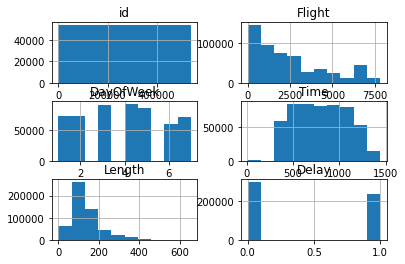

In [15]:
# creating a basic histogram
df.hist()
plt.show()

In [16]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Delay ~ Airline', data = df).fit()
aov_table = sm.stats.anova_lm(mod, type = 2)
print(aov_table)

                df         sum_sq     mean_sq           F  PR(>F)
Airline       17.0    9434.707828  554.982813  2417.81016     0.0
Residual  539365.0  123805.545232    0.229539         NaN     NaN


In [17]:
df.corr()

id    Flight  DayOfWeek      Time    Length     Delay
id         1.000000 -0.006156  -0.055474  0.029156  0.020781  0.139762
Flight    -0.006156  1.000000   0.000416 -0.005750 -0.341481 -0.046175
DayOfWeek -0.055474  0.000416   1.000000  0.001273  0.013397 -0.026199
Time       0.029156 -0.005750   0.001273  1.000000 -0.020612  0.150454
Length     0.020781 -0.341481   0.013397 -0.020612  1.000000  0.040489
Delay      0.139762 -0.046175  -0.026199  0.150454  0.040489  1.000000

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Xx = df.iloc[:,[2,5,6,7]]
y = df.iloc[:,[8]]
Xx.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Flight     539383 non-null  int64
 1   DayOfWeek  539383 non-null  int64
 2   Time       539383 non-null  int64
 3   Length     539383 non-null  int64
dtypes: int64(4)
memory usage: 16.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Delay   539383 non-null  int64
dtypes: int64(1)
memory usage: 4.1 MB


In [19]:
vif_data = pd.DataFrame()
vif_data["feature"] = Xx.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xx.values, i)
                          for i in range(len(Xx.columns))]
  
print(vif_data)

     feature       VIF
0     Flight  2.200690
1  DayOfWeek  4.211404
2       Time  5.482662
3     Length  3.661505


In [20]:
df.drop(df.columns[[0]],axis = 1,inplace =True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  int64 
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.9+ MB


In [22]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  
df['Airline']= le.fit_transform(df['Airline']) 
df.Airline.value_counts()

15    94097
5     60940
12    50254
1     45656
10    36605
14    34500
16    31126
6     27983
13    27619
4     21118
8     20827
0     20686
3     18112
17    13725
11    12630
2     11471
7      6456
9      5578
Name: Airline, dtype: int64

In [23]:
df['AirportFrom']= le.fit_transform(df['AirportFrom']) 
df.AirportFrom.value_counts()

16     34449
208    24822
80     22154
79     19843
154    16657
       ...  
189       16
259       15
125       10
8          9
3          2
Name: AirportFrom, Length: 293, dtype: int64

In [24]:
df['AirportTo']= le.fit_transform(df['AirportTo']) 
df.AirportTo.value_counts()

16     34440
208    24871
80     22153
79     19848
154    16656
       ...  
189       16
259       15
125       10
8          9
3          2
Name: AirportTo, Length: 293, dtype: int64

In [25]:
X = df.loc[:, df.columns != 'Delay']
y = df.loc[:, df.columns == 'Delay']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (431506, 7)
y_train:  (431506, 1)
X_test:  (107877, 7)
y_test:  (107877, 1)


In [28]:
#solver liblinear
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=1)
model1.fit(X_train, y_train)
model1.intercept_
model1.coef_

#Predictions
y_pred = model1.predict(X_test)


#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[45822 13937]
 [30925 17193]]


In [29]:
# #Accuracy Score - correct predictions / total number of data points
model1.score(X_test, y_test) 

0.5841374899190745

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
xx = df.iloc[:,[0,1,2,3,4,5,6]]
yy = df.iloc[:,7]  

#solver liblinear
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='liblinear', random_state=0)
model2.fit(xx, yy)

model2.coef_

array([[ 2.72487817e-02, -4.15564799e-05,  2.25121637e-04,
         7.36684315e-04, -3.41390541e-02,  1.05933477e-03,
         1.08139507e-03]])

In [31]:
model2.intercept_

array([-1.37213682])

In [32]:
y_pred_2 = model2.predict(xx)

In [33]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(yy, y_pred_2)
print(cm)

[[229784  69335]
 [155220  85044]]


In [34]:
#Accuracy Score - correct predictions / total number of data points
model2.score(xx,yy)

0.5836817252304949

In [35]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob = model2.predict_proba(xx)
fpr, tpr, thresholds =roc_curve(df["Delay"], y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) #Area under Curve 
print(roc_auc)

0.607818004244778


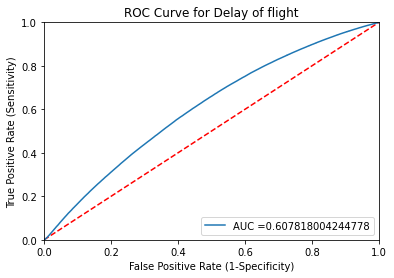

In [36]:
#ROC Curve
plt.title('ROC Curve for Delay of flight')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

In [37]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(yy, y_pred_2))

              precision    recall  f1-score   support

           0       0.60      0.77      0.67    299119
           1       0.55      0.35      0.43    240264

    accuracy                           0.58    539383
   macro avg       0.57      0.56      0.55    539383
weighted avg       0.58      0.58      0.56    539383



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [39]:
#Train the model 
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [40]:
knn.score(X_test,y_test)

0.6508987087145546

In [41]:
# dataframe = pd.read_csv('Airlines.csv')

In [42]:
# dataframe.info()

In [43]:
#Trend of the flight per day
# sns.barplot(x= 'Airline', y='Delay',data=dataframe, palette='plasma').set(title='Trend of Airline')

In [44]:
#time taken by airline
# sns.barplot(x= 'Airline', y='Time',data=dataframe, palette='plasma').set(title='Time Taken by Airline')

In [45]:
#Trend of the flight per day
# sns.barplot(x= 'DayOfWeek', y='Delay',data=dataframe, palette='plasma').set(title='Trend of Airline')

In [46]:
#Time -delay
# sns.barplot(x= 'Airline', y='Time', hue = 'Delay',data=dataframe, palette='plasma').set(title='Time -delay trend by Airline')

In [47]:
# dataframe['not_delayed'] = np.where(dataframe['Delay'] == 1)

In [48]:
# from sklearn.decomposition import PCA
# from sklearn import preprocessing

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


#solver liblinear
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression(solver='liblinear', random_state=0)
model4.fit(X_train, y_train)
model4.intercept_

#predictions
preds=model4.predict(X_test)
print(classification_report(y_test,preds))
cm = metrics.confusion_matrix(y_test, preds)
print(cm)

#predictions training
print("training_score")
preds_train=model4.predict(X_train)
print(classification_report(y_train,preds_train))
cm = metrics.confusion_matrix(y_train, preds_train)
print(cm)

              precision    recall  f1-score   support

           0       0.60      0.77      0.67     59759
           1       0.55      0.36      0.43     48118

    accuracy                           0.58    107877
   macro avg       0.57      0.56      0.55    107877
weighted avg       0.58      0.58      0.57    107877

[[45822 13937]
 [30925 17193]]
training_score
              precision    recall  f1-score   support

           0       0.60      0.76      0.67    239360
           1       0.55      0.36      0.43    192146

    accuracy                           0.58    431506
   macro avg       0.57      0.56      0.55    431506
weighted avg       0.58      0.58      0.57    431506

[[183107  56253]
 [123342  68804]]


In [50]:
df.head()

Airline  Flight  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
0        4     269          253        135          3    15     205      1
1       14    1558          217         60          3    15     222      1
2        1    2400          154         80          3    20     165      1
3        1    2466          253         80          3    20     195      1
4        2     108           14        252          3    30     202      0

In [51]:
df1 = df.copy(deep = True)

In [52]:
df1.drop(['AirportTo'],axis =1, inplace = True)

In [53]:
df1.columns

Index(['Airline', 'Flight', 'AirportFrom', 'DayOfWeek', 'Time', 'Length',
       'Delay'],
      dtype='object')

In [54]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
to_be_scaled = df1[['Flight','Time', 'Length']]
robust_df = scaler.fit_transform(to_be_scaled)
robust_df = pd.DataFrame(robust_df,columns= to_be_scaled.columns)
robust_df.head()

Flight      Time    Length
0 -0.507748 -1.659574  1.111111
1 -0.082756 -1.659574  1.320988
2  0.194857 -1.648936  0.617284
3  0.216617 -1.648936  0.987654
4 -0.560831 -1.627660  1.074074

In [55]:
df1.drop(['Flight','Time', 'Length'],axis =1 , inplace = True)

In [56]:
df1 = pd.concat([robust_df,df1],axis =1)

In [57]:
df1.head()

Flight      Time    Length  Airline  AirportFrom  DayOfWeek  Delay
0 -0.507748 -1.659574  1.111111        4          253          3      1
1 -0.082756 -1.659574  1.320988       14          217          3      1
2  0.194857 -1.648936  0.617284        1          154          3      1
3  0.216617 -1.648936  0.987654        1          253          3      1
4 -0.560831 -1.627660  1.074074        2           14          3      0

In [58]:
X = df1.iloc[:,[0,1,2,3,4,5]]
y =df1.iloc[:,6]
print(X.info())
print(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


#solver liblinear
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression(solver='liblinear', random_state=0)
model4.fit(X_train, y_train)
model4.intercept_

#predictions
preds=model4.predict(X_test)
print(classification_report(y_test,preds))
cm = metrics.confusion_matrix(y_test, preds)
print(cm)

#predictions training
print("training_score")
preds_train=model4.predict(X_train)
print(classification_report(y_train,preds_train))
cm = metrics.confusion_matrix(y_train, preds_train)
print(cm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539383 non-null  float64
 1   Time         539383 non-null  float64
 2   Length       539383 non-null  float64
 3   Airline      539383 non-null  int64  
 4   AirportFrom  539383 non-null  int64  
 5   DayOfWeek    539383 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 24.7 MB
None
0         1
1         1
2         1
3         1
4         0
         ..
539378    0
539379    0
539380    0
539381    1
539382    1
Name: Delay, Length: 539383, dtype: int64
              precision    recall  f1-score   support

           0       0.60      0.76      0.67     89905
           1       0.55      0.36      0.43     71910

    accuracy                           0.58    161815
   macro avg       0.57      0.56      0.55    161815
weighted avg       0.58      0.58      0.56 

In [60]:


# Now will perform RandomForest Classifier

# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# rfc=RandomForestClassifier()
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

model5=RandomForestClassifier(criterion='gini',max_depth=8,max_features='log2',n_estimators=200)
model5.fit(X_train,y_train)
#predictions - test
y_pred2=model5.predict(X_test)

print("confusion matrix_test")
print(confusion_matrix(y_test,y_pred2))

print("classification report_test")
print(classification_report(y_test,y_pred2))

#predictions-train
y_pred2_train=model5.predict(X_train)
print("confusion matrix_train")
print(confusion_matrix(y_train,y_pred2_train))

print("classification report_train")
print(classification_report(y_train,y_pred2_train))

confusion matrix_test
[[78395 11510]
 [45736 26174]]
classification report_test
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     89905
           1       0.69      0.36      0.48     71910

    accuracy                           0.65    161815
   macro avg       0.66      0.62      0.61    161815
weighted avg       0.66      0.65      0.62    161815

confusion matrix_train
[[182435  26779]
 [106531  61823]]
classification report_train
              precision    recall  f1-score   support

           0       0.63      0.87      0.73    209214
           1       0.70      0.37      0.48    168354

    accuracy                           0.65    377568
   macro avg       0.66      0.62      0.61    377568
weighted avg       0.66      0.65      0.62    377568



In [61]:
%pip install catboost
from catboost import CatBoostClassifier
catboost_params = {'loss_function' : 'CrossEntropy',
            'iterations': 2000,
            'depth': 5,
            'learning_rate': 0.01,
            'eval_metric': 'AUC',
            'random_seed': 4,
            'l2_leaf_reg': 15.0,
            'bagging_temperature': 0.75,
            'allow_writing_files': False, 'border_count':50
        }
model = CatBoostClassifier(**catboost_params)
model.fit(X_train, y_train,verbose=False)
# predictions
y_pred_catboost=model.predict(X_test)

print(classification_report(y_test, y_pred_catboost))

print(roc_auc_score(y_test,y_pred_catboost))

#predictions train
y_pred_catboost_train =model.predict(X_train)

print(classification_report(y_train, y_pred_catboost_train))

print(roc_auc_score(y_train,y_pred_catboost_train))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 23 kB/s 
              precision    recall  f1-score   support

           0       0.65      0.82      0.73     89905
           1       0.67      0.44      0.53     71910

    accuracy                           0.65    161815
   macro avg       0.66      0.63      0.63    161815
weighted avg       0.66      0.65      0.64    161815

0.6324702407834484
              precision    recall  f1-score   support

           0       0.65      0.82      0.72    209214
           1       0.67      0.44      0.53    168354

    accuracy                           0.65    377568
   macro avg       0.66      0.63      0.63    377568
weighted avg       0.66      0.65      0.64    377568

0.6331869023019979


In [62]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb_cl=xgb.XGBClassifier()

# fit
xgb_cl.fit(X_train,y_train)
# predict
preds=xgb_cl.predict(X_test)

print("test report")
print(classification_report(y_test,preds))

preds_train=xgb_cl.predict(X_train)

print("train report")
print(classification_report(y_train,preds_train))

test report
              precision    recall  f1-score   support

           0       0.64      0.84      0.73     89905
           1       0.67      0.41      0.51     71910

    accuracy                           0.65    161815
   macro avg       0.66      0.62      0.62    161815
weighted avg       0.65      0.65      0.63    161815

train report
              precision    recall  f1-score   support

           0       0.64      0.84      0.72    209214
           1       0.67      0.41      0.51    168354

    accuracy                           0.65    377568
   macro avg       0.65      0.62      0.62    377568
weighted avg       0.65      0.65      0.63    377568

